In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import uniform, norm, multivariate_normal

<h1 align="center"><b><u>Lecture 10 - Gaussian Measures in Hilbert Space</u></b></h1>

<h2>Singluar Measures</h2>

Consider the domain $X \subset \mathbb{R}$ and two subsets $A$, $B$ s.t. $A \cup B = X$ and $A \cap B = \emptyset$. 

Now consider two measures $\nu$, $\mu$ on X.

If $\nu(A) = 0$,   and  $\mu(B) = 0$
then $\nu$ and $\mu$ are <b>mutually singular</b>.  This is displayed below.



<img src="img/sm.png" width=400 height=400 />

<h2>Product Measures</h2>

Here, we state Kakutani's Theorem and use it to demonstrate the dichotomy of Gaussian product measures. 

Consider the two product measures 
$$
\nu = \prod_{k=1}^{\infty}\nu_k
\hspace{5mm} \text{and} \hspace{5mm}
\mu = \prod_{k=1}^{\infty}\mu_k
$$

Kakutani's Theorem states that for $\nu$ and $\mu$ to be absolutely continuous, then

$$
\prod_{k=1}^{\infty} \int_{\mathbb{R}} \sqrt{\frac{d\nu_k}{d\mu_k}}d\mu_k < \infty
$$

Defining $H$, as this product
$$
H(\nu, \mu) = \prod_{k=1}^{\infty} \int_{\mathbb{R}} \sqrt{d\nu_k d\mu_k} < \infty
$$

\begin{align*}
    \text{If} \hspace{5mm} H(\nu,\mu) &< \infty \hspace{5mm} \nu << \mu \\
    \text{If} \hspace{5mm} H(\nu,\mu) &= 0 \hspace{5mm} \nu \perp \mu
\end{align*}

Now taking the example of the Gaussian product measure, where we consider $H$ for a single $k$:

\begin{align*}
    \nu_k &= \mathcal{N}(m_k^{\nu}, \sigma_k^{\nu})\\
    \mu_k &= \mathcal{N}(m_k^{\mu}, \sigma_k^{\mu})
\end{align*}

\begin{align*}
    H(\nu_k, \mu_k) &= \int_{\mathbb{R}} \sqrt{d\nu_k d\mu_k} \\
    & = (\sigma_k^{\nu} \sigma_k^{\mu})^{1/4} \sqrt{\frac{2}{\sigma_k^{\mu} + \sigma_k^{\nu}}}
    \exp \left( -\frac{(m_k^{\nu} - m_k^{\mu})}{4(\sigma_k^{\nu}+\sigma_k^{\mu})} \right)
\end{align*}

For simplicity, we consider the case where both means $m_k^{\nu}, m_k^{\mu} = 0, \forall k$. Giving:

$$
H(\nu, \mu) = \prod_{k=1}^{\infty}(\sigma_k^{\nu} \sigma_k^{\mu})^{1/4} \sqrt{\frac{2}{\sigma_k^{\mu} + \sigma_k^{\nu}}}
$$

It can be shown that this product will converge if

$$
\sum_{k=1}^{\infty}\left( \frac{\sigma_k^{\nu} - \sigma_k^{\mu}}{\sigma_k^{\mu}} \right)^2 < \infty
$$

and so if this sum converges, then the Kakutani criterion is satisfied, and $\nu, \mu$ are absolutely continuous.  Now to show the dichotomy of Gaussian product measures, consider

\begin{align*}
    \nu &= \prod_{k=1}^{\infty}\mathcal{N}(0,\sigma)\\
    \mu &= \prod_{k=1}^{\infty}\mathcal{N}(0,\alpha\sigma)\\
\end{align*}
with $\alpha \in \mathbb{R}_{>0}$, $\alpha \neq 1$

Then the summation becomes 
$$
\sum_{k=1}^{\infty}\left( \frac{1-\alpha}{\alpha} \right)^2 \rightarrow \infty
$$

Which for any $\alpha \neq 1$, no matter how small will be unbounded, hence the produce measures are <b>mutually singular</b>.

<h2>Practical Example</h2>

From Alexander Kukush's book "Gaussian Measures in Hilbert Space", there is a condition on the variances of a Gaussian product that also leads to a convergent derivative, hence equivalence in infinite dimensions.  This example is shown below and demonstrated in the code.

Given a bounded sequence $\{ \beta_k \}_{k=1}^{\infty}$ where $\sum_{k=1}^{\infty}\beta_k < \infty$, and Gaussian product measures $\nu = \prod_k \nu_k$, $\nu_k = \mathcal{N}(0,1)$ and $\mu = \prod_k \mu_k$, $\mu_k = \mathcal{N}(0,1+\beta_k)$.  The Radon-Nikodym derivative of $\nu$ wrt $\mu$:

$$\frac{d\nu}{d\mu}(x) = \prod_{k=1}^{\infty} \frac{1}{1+\beta_k} \exp \left( \frac{\beta_k x_k^2}{2(1+\beta_k)} \right)$$  

converges almost everywhere with respect to $\mu$.  

The theory is tested below using two forms of the sequence $\{ \beta_k \}_{k=1}^{\infty}$, one bounded where $\beta_k = \frac{1}{2^k}$, $\sum_{k=1}^{\infty} \beta_k = 1$. An unbounded sequence is also used to compare, where $\beta_k = 1$, $\sum_{k=1}^{\infty} \beta_k= \infty$.

In [2]:
def beta_bounded(k):
    return 1/pow(2, k)

def beta_unbounded(k):
    return 1

The Radon-Nikodym derivative is evaluated at random values of $x$ and averaged over $N$ samples.  The dimension of the problem is increased to observe the convergence/divergence of the derivative.

In [3]:
def RND(dims, N, beta):
    rnd = []
    for d in dims:
        
        # Zero mean
        m1 = np.zeros((d,))
        m2 = np.zeros((d,))
        
        # Diagonal of Covariance matrices
        s1 = np.ones((d,))
        s2 = np.ones((d,))
        
        # Add on the sequence of betas to the second variance
        for i in range(d):
            s2[i] += beta(i)
            
        # Find an avearge of the derivative based on N samples from a standard mutlidimensional normal distribution
        y = 0
        for _ in range(N):
            x = np.random.randn(d)
            f1 = multivariate_normal.pdf(x=x, mean=m1, cov=np.diag(s1))
            f2 = multivariate_normal.pdf(x=x, mean=m2, cov=np.diag(s2))
            y += (f2/f1)
        rnd.append(y/N)
        
    return rnd

In [4]:
dims = np.arange(1,200,30)
N = 3000

In [5]:
rnd_bounded = RND(dims, N, beta_bounded)
rnd_unbounded = RND(dims, N, beta_unbounded)

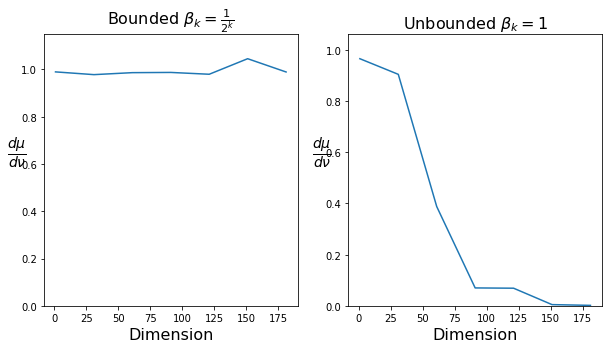

In [6]:
## Plotting
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
ax1.plot(dims, rnd_bounded)
ax2.plot(dims, rnd_unbounded)
ax1.set_title(r'Bounded $\beta_k = \frac{1}{2^k}$', fontsize=16)
ax2.set_title(r'Unbounded $\beta_k = 1$', fontsize=16)
ax1.set_ylim(0,max(rnd_bounded)*1.1)
ax2.set_ylim(0,max(rnd_unbounded)*1.1)
ax1.set_xlabel('Dimension', fontsize=16)
ax2.set_xlabel('Dimension', fontsize=16)
ax1.set_ylabel(r'$\frac{d\mu}{d\nu}$', rotation=0, fontsize=20)
ax2.set_ylabel(r'$\frac{d\mu}{d\nu}$', rotation=0, fontsize=20)
plt.show()

Another example of the curse of dimensionality is shown through the degeneracy of acceptance probability with increasing dimension for an MCMC sampler.

In [7]:
# basic MH sampler implementation
def MH(initial, proposal_cov, target, N):
    
    x_prev = initial
    
    acc = 0
    for i in range(N):
        x_new = multivariate_normal.rvs(mean=x_prev, cov=proposal_cov)
        
        a = min(target.pdf(x_new)/target.pdf(x_prev), 1)
        u = np.random.rand()
        if u<a:
            acc+=1
            x_prev = x_new
        else:
            pass
    return acc/N

In [8]:
dims = np.arange(1, 40, 2)
acceptance = []
for d in dims:
    start = np.zeros(d)
    proposal_cov = np.eye(d)
    target = multivariate_normal(mean=np.zeros(d), cov=np.eye(d))
    acceptance.append(MH(start, proposal_cov, target,1000))

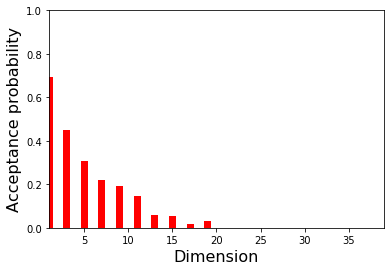

In [9]:
## Plotting
plt.bar(dims,acceptance,color='r')
plt.ylim(0, 1)
plt.xlim(1, max(dims))
plt.ylabel('Acceptance probability',fontsize=16)
plt.xlabel('Dimension',fontsize=16)
plt.show()